In [1]:

import problem_def
import world

In [2]:

rule1 = problem_def.Ruledef(['red'], ['blue'], 'first')
rule2 = problem_def.Ruledef(['green'], ['pink'], 'second')
print(problem_def.create_problem(['red', 'pink', 'green', 'darkred', 'greenyellow'], []).asPDDL(), file=open('tmp/blocks_test.pddl', 'w'))


In [12]:
rule1 = problem_def.Ruledef(['red'], ['blue'], 'first')
print(problem_def.create_problem(['red', 'pink', 'green', 'darkred', 'greenyellow'], [rule1]).asPDDL(), file=open('tmp/blocks_test2.pddl', 'w'))
w2 = world.PDDLWorld('blocks-domain.pddl', 'tmp/blocks_test2.pddl')
print(w2.test_failure(), 'True')
print(problem_def.create_problem(['red', 'pink', 'green', 'navy', 'greenyellow'], [rule1]).asPDDL(), file=open('tmp/blocks_test3.pddl', 'w'))
w3 = world.PDDLWorld('blocks-domain.pddl', 'tmp/blocks_test3.pddl')
print(w3.test_failure(), 'False')

Parsing domain blocks-domain.pddl
Parsing problem tmp/blocks_test2.pddl
running ff with blocks-domain.pddl tmp/world_problem.pddl
no plan
True True
Parsing domain blocks-domain.pddl
Parsing problem tmp/blocks_test3.pddl
running ff with blocks-domain.pddl tmp/world_problem.pddl
default
False False


In [4]:
cat 'tmp/world_problem.pddl'

(define (problem block-problem)
	(:domain blocksworld)
	(:objects b0 b1 b2 b3 b4 t0)
	(:init 
		(arm-empty )
		(on-table b0)
		(clear b0)
		(on-table b1)
		(clear b1)
		(on-table b2)
		(clear b2)
		(on-table b3)
		(clear b3)
		(on-table b4)
		(clear b4)
		(in-tower t0)
		(clear t0)
		(red b0)
		(pink b1)
		(green b2)
		(darkred b3)
		(red b3)
		(greenyellow b4)
		(green b4)
	)
	(:goal (and (forall (?x) (in-tower ?x)) (forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))))
)

In [8]:
cat 'tmp/blocks_test3.pddl'

(define (problem block-problem)
	(:domain blocksworld)
	(:objects b0 b1 b2 b3 b4 t0)
	(:init 
		(arm-empty )
		(on-table b0)
		(clear b0)
		(on-table b1)
		(clear b1)
		(on-table b2)
		(clear b2)
		(on-table b3)
		(clear b3)
		(on-table b4)
		(clear b4)
		(in-tower t0)
		(clear t0)
		(red b0)
		(pink b1)
		(green b2)
		(navy b3)
		(blue b3)
		(greenyellow b4)
		(green b4)
	)
	(:goal (and (forall (?x) (in-tower ?x)) (forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))))
)


In [3]:
import pddl_functions
domain, problem = pddl_functions.parse('tmp/domain.pddl', 'tmp/blocks_test.pddl')

Parsing domain tmp/domain.pddl
Parsing problem tmp/blocks_test.pddl


In [10]:
import ff
ff.ff('blocks-domain.pddl', 'tmp/blocks_test3.pddl')

"\nff: parsing domain file\ndomain 'BLOCKSWORLD' defined\n ... done.\nff: parsing problem file\nproblem 'BLOCK-PROBLEM' defined\n ... done.\n\n\n\nCueing down from goal distance:    6 into depth [1]\n                                   5            [1]\n                                   3            [1]\n                                   2            [1]\n                                   1            [1]\n                                   0            \n\nff: found legal plan as follows\n\nstep    0: PUT B4 T0\n        1: PUT B3 B4\n        2: PUT B0 B3\n        3: PUT B2 B0\n        4: PUT B1 B2\n     \n\ntime spent:    0.00 seconds instantiating 36 easy, 0 hard action templates\n               0.00 seconds reachability analysis, yielding 47 facts and 30 actions\n               0.00 seconds creating final representation with 46 relevant facts\n               0.00 seconds building connectivity graph\n               0.00 seconds searching, evaluating 8 states, to a max depth of 1\n 

In [11]:
ff.ff('blocks-domain.pddl', 'tmp/world_problem.pddl')

"\nff: parsing domain file\ndomain 'BLOCKSWORLD' defined\n ... done.\nff: parsing problem file\nproblem 'BLOCK-PROBLEM' defined\n ... done.\n\n\nff: goal can be simplified to FALSE. No plan will solve it\n\n"

Parsing domain blocks-domain.pddl
Parsing problem tmp/blocks_test.pddl
False
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (1.7999999999999998, 0), (2.1999999999999997, 0)]


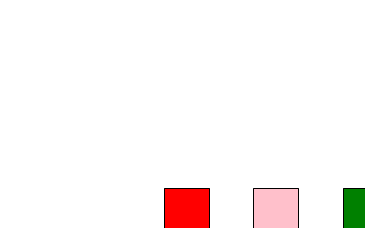

[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (0.2, 0.4), (0.2, 0.2), (0.2, 0)]


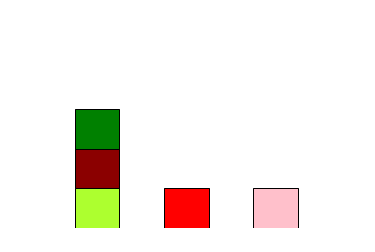

In [9]:
w = world.PDDLWorld('blocks-domain.pddl', 'tmp/blocks_test.pddl')
print(w.test_failure())

w.draw()
w.update('put', ['b4', 't0'])
w.update('put', ['b3', 'b4'])
w.update('put', ['b2', 'b3'])
w.draw()

In [7]:
w.test_failure()

True

In [12]:
print(w3.problem.asPDDL())

(define (problem block-problem)
	(:domain blocksworld)
	(:objects b0 b1 b2 b3 b4 t0)
	(:init 
		(arm-empty )
		(on-table b0)
		(clear b0)
		(on-table b1)
		(clear b1)
		(on-table b2)
		(clear b2)
		(on-table b3)
		(clear b3)
		(on-table b4)
		(clear b4)
		(in-tower t0)
		(clear t0)
		(red b0)
		(pink b1)
		(green b2)
		(navy b3)
		(blues b3)
		(greenyellow b4)
		(green b4)
	)
	(:goal (and (forall (?x) (in-tower ?x)) (forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))))
)


In [10]:
print(problem.asPDDL())

(define (problem block-problem)
	(:domain blocksworld)
	(:objects b0 b1 b2 b3 b4 t0)
	(:init 
		(arm-empty )
		(on-table b0)
		(clear b0)
		(on-table b1)
		(clear b1)
		(on-table b2)
		(clear b2)
		(on-table b3)
		(clear b3)
		(on-table b4)
		(clear b4)
		(in-tower t0)
		(clear t0)
		(red b0)
		(pink b1)
		(green b2)
		(darkred b3)
		(red b3)
		(greenyellow b4)
		(green b4)
	)
	(:goal (forall (?x) (in-tower ?x)))
)


In [3]:
import ff
ff.run('blocks-domain.pddl', 'tmp/blocks_test.pddl')

[('put', ['b4', 't0']),
 ('put', ['b3', 'b4']),
 ('put', ['b2', 'b3']),
 ('put', ['b1', 'b2']),
 ('put', ['b0', 'b1'])]

In [5]:
from  block_plotting import colour_names

In [6]:
colour_names

{'aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [15]:
colour_dict = {'red': ['red', 'darkred', 'maroon', 'firebrick', 'crimson'],
'green': ['olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'charteuse', 'lawngreen', 'palegreen', 'forestgreen', 'limegreen', 'green', 'seagreen'],
'blues': ['cornflowerblue', 'royalblue', 'midnightblue', 'navy', 'darkblue', 'blue', 'mediumblue', 'dodgerblue', 'deepskyblue'],
'yellow': ['yellow', 'lightyellow', 'lightgoldenrodyellow'],
'purple': ['indigo', 'darkorchid', 'darkviolet', 'rebeccapurple', 'purple', 'blueviolet', 'darkmagenta'],
'pink': ['fuchsia', 'hotpink', 'deeppink', 'pink', 'lightpink', 'magenta'],
'orange': ['orange', 'darkorange', 'bisque']}


In [16]:
for key in colour_dict.keys():
    for value in colour_dict[key]:
        print('({} ?x)'.format(value))

(red ?x)
(darkred ?x)
(maroon ?x)
(firebrick ?x)
(crimson ?x)
(olivedrab ?x)
(yellowgreen ?x)
(darkolivegreen ?x)
(greenyellow ?x)
(charteuse ?x)
(lawngreen ?x)
(palegreen ?x)
(forestgreen ?x)
(limegreen ?x)
(green ?x)
(seagreen ?x)
(cornflowerblue ?x)
(royalblue ?x)
(midnightblue ?x)
(navy ?x)
(darkblue ?x)
(blue ?x)
(mediumblue ?x)
(dodgerblue ?x)
(deepskyblue ?x)
(yellow ?x)
(lightyellow ?x)
(lightgoldenrodyellow ?x)
(indigo ?x)
(darkorchid ?x)
(darkviolet ?x)
(rebeccapurple ?x)
(purple ?x)
(blueviolet ?x)
(darkmagenta ?x)
(fuchsia ?x)
(hotpink ?x)
(deeppink ?x)
(pink ?x)
(lightpink ?x)
(magenta ?x)
(orange ?x)
(darkorange ?x)
(bisque ?x)
